## EXPLORATORY DATA ANALYSIS(EDA)
Exploratory Data Analysis (EDA) is a preliminary step in the data analysis process where data is visually and statistically examined to uncover patterns, relationships, anomalies, and insights. Through techniques such as visualization, summary statistics, and data structure examination, EDA aims to ensure a deep foundational understanding of the data. This process not only aids in data cleaning and preparation but also informs the selection of appropriate statistical tests or predictive models, helping analysts make informed decisions throughout subsequent stages of analysis.

#### Importing the necessary libraries.

In [35]:
import pandas as pd
import numpy as np
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from IPython.display import display, Markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
# Reading in the data
def load_and_preview_data(filepath):
    """Load the dataset and display the first few rows."""
    data = pd.read_csv(filepath)
    preview = data.head()
    return data, preview

# Load and preview the dataset
data, data_preview = load_and_preview_data("temporal_merged_data.csv")
data_preview


,Year,Country,Average_Temperature,Average_Rainfall,Item,Yield,Pesticides
0,1990,Ghana,26.73,1187.0,Cassava,84170,65.8
1,1990,Ghana,26.73,1187.0,Maize,11889,65.8
2,1990,Ghana,26.73,1187.0,Plantains and others,61890,65.8
3,1990,Ghana,26.73,1187.0,"Rice, paddy",16510,65.8
4,1990,Ghana,26.73,1187.0,Sorghum,6310,65.8


- Year: Represents the year of the data entry.
- Country: The country to which the data pertains, in this case, Ghana.
- Average_Temperature: The average temperature for the specified year.
- Average_Rainfall: The average rainfall for the specified year.
- Item: The type of agricultural item or crop.
- Yield: The yield of the specified item or crop.
- Pesticides: The amount of pesticides used.

In [37]:
data["Country"].unique()

array(['Ghana', 'Turkey', 'Australia', 'India', 'Egypt', 'Algeria',
       'Kazakhstan', 'Netherlands', 'Madagascar', 'Eritrea', 'Greece',
       'Iraq', 'Azerbaijan', 'Mali', 'Indonesia', 'Thailand',
       'Central African Republic', 'Spain', 'Colombia', 'Lebanon',
       'United Kingdom', 'Brazil', 'Libya', 'Germany', 'Switzerland',
       'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco', 'Sri Lanka',
       'Guinea', 'Denmark', 'Argentina', 'Senegal', 'Bangladesh', 'Qatar',
       'Cameroon', 'Ireland', 'South Africa', 'Tajikistan', 'Mexico',
       'Pakistan', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Uganda', 'Nepal',
       'Ukraine', 'Rwanda', 'Canada', 'Jamaica', 'Malaysia', 'Malawi',
       'Peru', 'Portugal', 'Slovenia', 'Chile', 'Angola', 'Zambia',
       'Nicaragua', 'Bahrain', 'Mozambique', 'Lesotho', 'Saudi Arabia',
       'Italy', 'Belarus', 'Uruguay', 'Kenya', 'Bahamas', 'Niger',
       'Mauritania', 'Norway', '

In [38]:
def data_summary(df):
    """Provide a summary of the dataset's main characteristics."""
    # Describe the dataset to get summary statistics for numerical columns
    numerical_summary = df.describe()
    
    # Get the unique values for categorical columns
    country_unique_values = df['Country'].unique()
    item_unique_values = df['Item'].unique()
    
    return numerical_summary, country_unique_values, item_unique_values

# Get the data summary
numerical_summary, country_unique_values, item_unique_values = data_summary(data)
numerical_summary

,Year,Average_Temperature,Average_Rainfall,Yield,Pesticides
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,1149.050816,77047.863282,37069.136973
std,7.052997,6.311828,709.736848,84950.194454,59954.787836
min,1990.000000,1.300000,51.000000,50.000000,0.040000
25%,1995.000000,16.710000,593.000000,19918.750000,1695.710000
50%,2001.000000,21.510000,1083.000000,38295.000000,17517.760000
75%,2008.000000,26.000000,1668.000000,104598.250000,48687.880000
max,2013.000000,30.650000,3240.000000,501412.000000,367778.000000


### Numerical Columns Summary:
1. Year:
  - Range: 1990 to 2013
  - Total Entries: 28,248
2. Average_Temperature:
  - Range: 1.3°C to 30.65°C
  - Mean: 20.54°C
3. Average_Rainfall:
  - Range: 51mm to 3,240mm
  - Mean: 1,149.05mm
4. Yield:
  - Range: 50 to 501,412
  - Mean: 77,047.86

**Note: The unit for yield is not specified in the provided data, but it's often measured in kilograms per hectare or similar units**
5. Pesticides:
  - Range: 0.04 to 367,778
  - Mean: 37,069.14
  
**Note: The unit for pesticides is not specified but could refer to the amount used in kilograms or liters**

In [39]:
# Normalize the data
def normalize_data(data):
    # Remove rows with Year before 1990
    data = data[data['Year'] >= 1990]
    
    # List of columns to normalize
    columns_to_normalize = ["Pesticides", "Average_Rainfall", "Average_Temperature"]
    
    # Normalize the specified columns
    for col in columns_to_normalize:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    
    return data

# Apply the function to the dataset
data = normalize_data(data)

# Display the first few rows of the normalized dataset
data.head(), data.tail()

(   Year Country  Average_Temperature  Average_Rainfall                  Item  \
 0  1990   Ghana              0.86644          0.356225               Cassava   
 1  1990   Ghana              0.86644          0.356225                 Maize   
 2  1990   Ghana              0.86644          0.356225  Plantains and others   
 3  1990   Ghana              0.86644          0.356225           Rice, paddy   
 4  1990   Ghana              0.86644          0.356225               Sorghum   
 
    Yield  Pesticides  
 0  84170    0.000179  
 1  11889    0.000179  
 2  61890    0.000179  
 3  16510    0.000179  
 4   6310    0.000179  ,
        Year  Country  Average_Temperature  Average_Rainfall      Item   Yield  \
 28243  2013  Croatia             0.350256           0.33302     Maize   65000   
 28244  2013  Croatia             0.350256           0.33302  Potatoes  158785   
 28245  2013  Croatia             0.350256           0.33302   Sorghum   50203   
 28246  2013  Croatia             0.350

#### Distribution plots

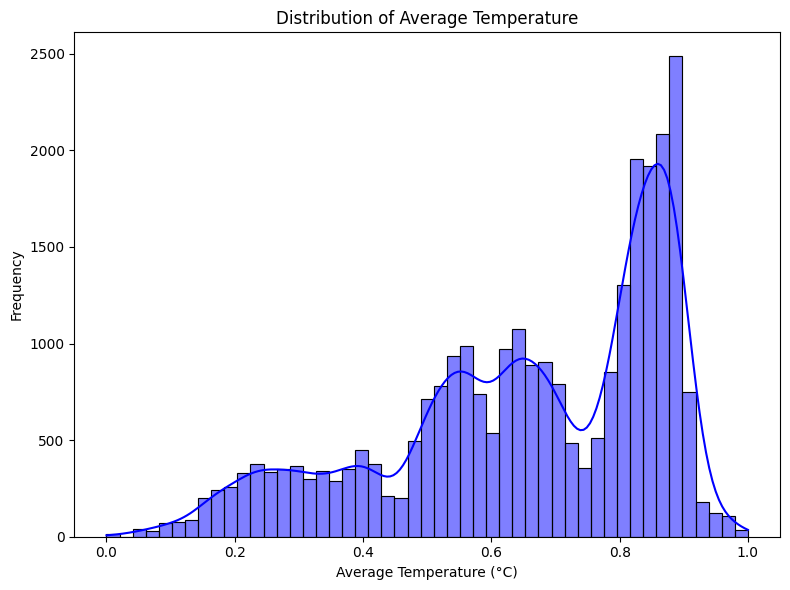

In [40]:
# Distribution of Average Temperature
def plot_temperature_distribution(df):
    """Plot histogram for Average Temperature."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Average_Temperature'], kde=True, color='blue')
    plt.title('Distribution of Average Temperature')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_temperature_distribution(data)


For the average temperature, the histogram shows a bimodal distribution. This suggests that the data may contain two distinct groups or periods with differing temperature patterns.
The majority of the temps are focused between 15°C and 20°C.

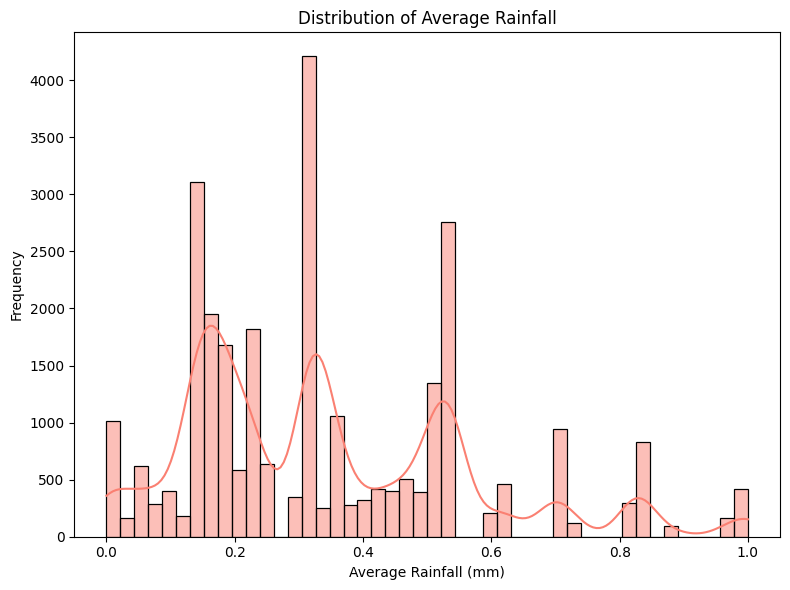

In [41]:
# Distribution of Average rainfall
def plot_rainfall_distribution(df):
    """Plot histogram for Average Rainfall."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Average_Rainfall'], kde=True, color='salmon')
    plt.title('Distribution of Average Rainfall')
    plt.xlabel('Average Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_rainfall_distribution(data)

- The data appears to be right-skewed, which suggests there are some years with exceptionally high rainfall amounts.
- A significant portion of the data lies in the range of approximately 500mm to 2,000mm of rainfall.

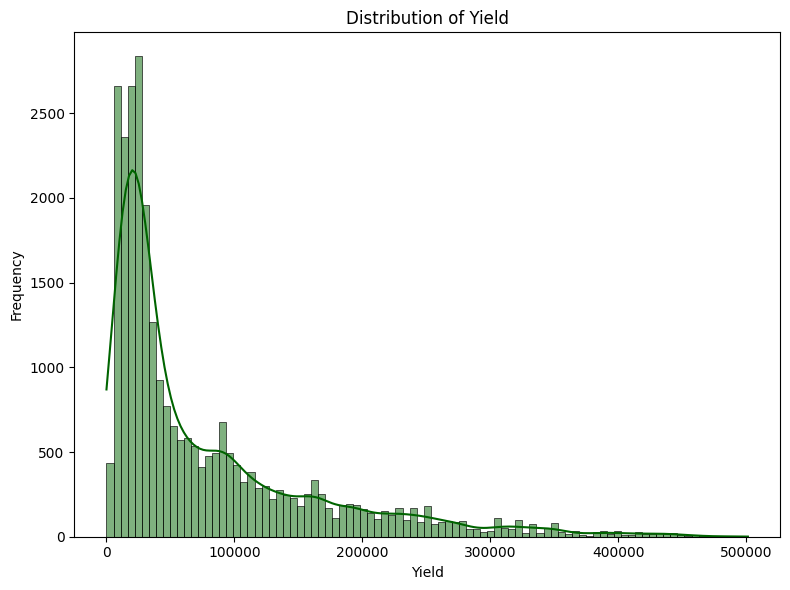

In [42]:
def plot_yield_distribution(df):
    """Plot histogram for Yield."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Yield'], kde=True, color='Darkgreen')
    plt.title('Distribution of Yield')
    plt.xlabel('Yield')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_yield_distribution(data)


The distribution is right-skewed, indicating that while most crops have a yield in the lower range, there are some crops or instances with notably high yields.

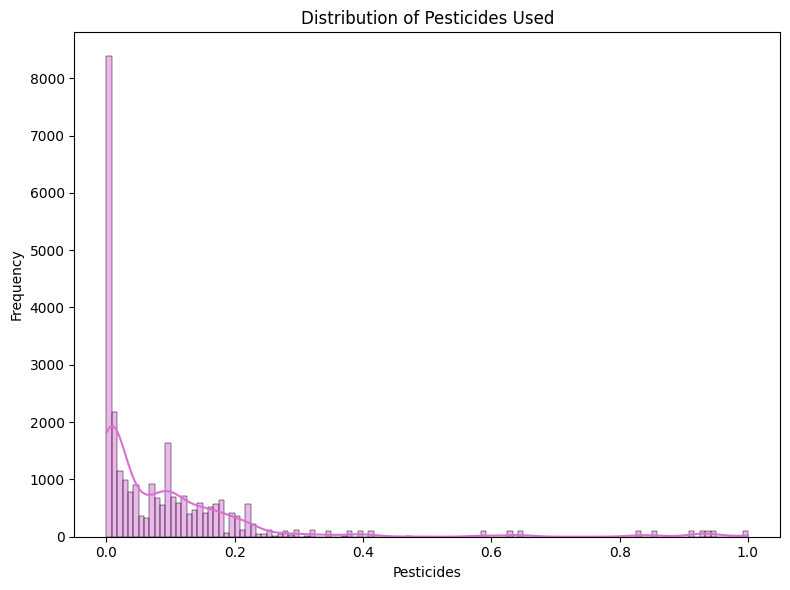

In [43]:
def plot_pesticides_distribution(df):
    """Plot histogram for Pesticides."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Pesticides'], kde=True, color='orchid')
    plt.title('Distribution of Pesticides Used')
    plt.xlabel('Pesticides')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_pesticides_distribution(data)


The distribution is highly right-skewed. This suggests that, for a majority of the data points, a relatively lower amount of pesticides is used. However, there are some instances where the usage of pesticides is significantly higher.

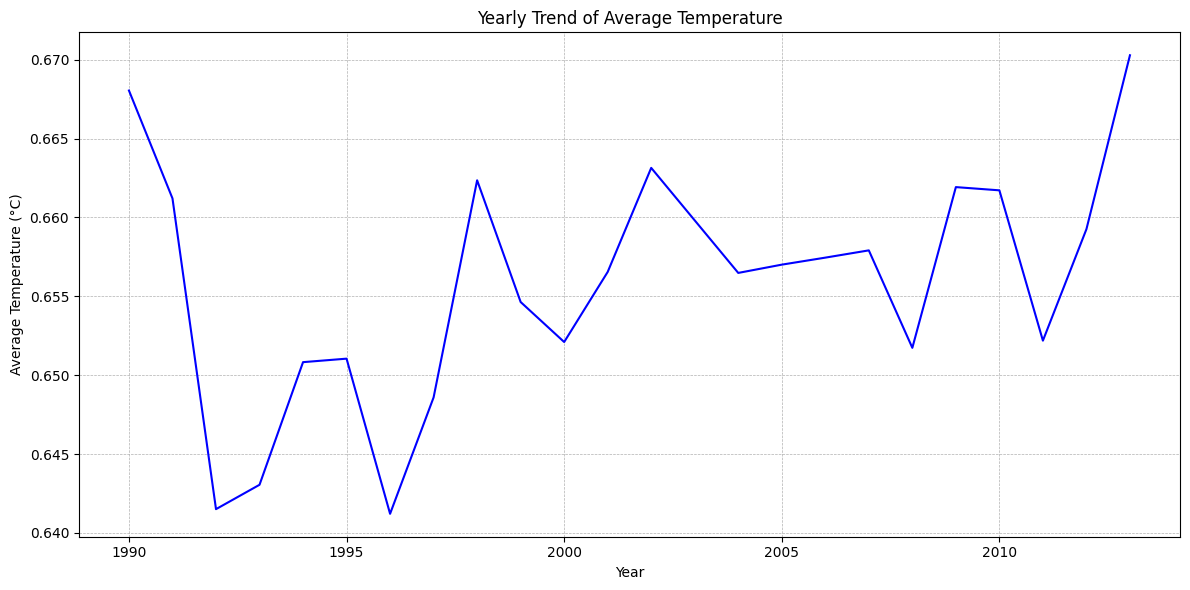

In [44]:
def plot_yearly_temperature_trend(df):
    """Plot the yearly trend of Average Temperature."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Average_Temperature', estimator='mean', ci=None, color='blue')
    plt.title('Yearly Trend of Average Temperature')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_temperature_trend(data)


- The line plot represents the mean average temperature for each year.
- We can observe a general fluctuating trend, but there doesn't seem to be a consistent increase or decrease over the years.
- There are certain years where the temperature has spiked or dipped, but overall, the temperature remains within a certain range.

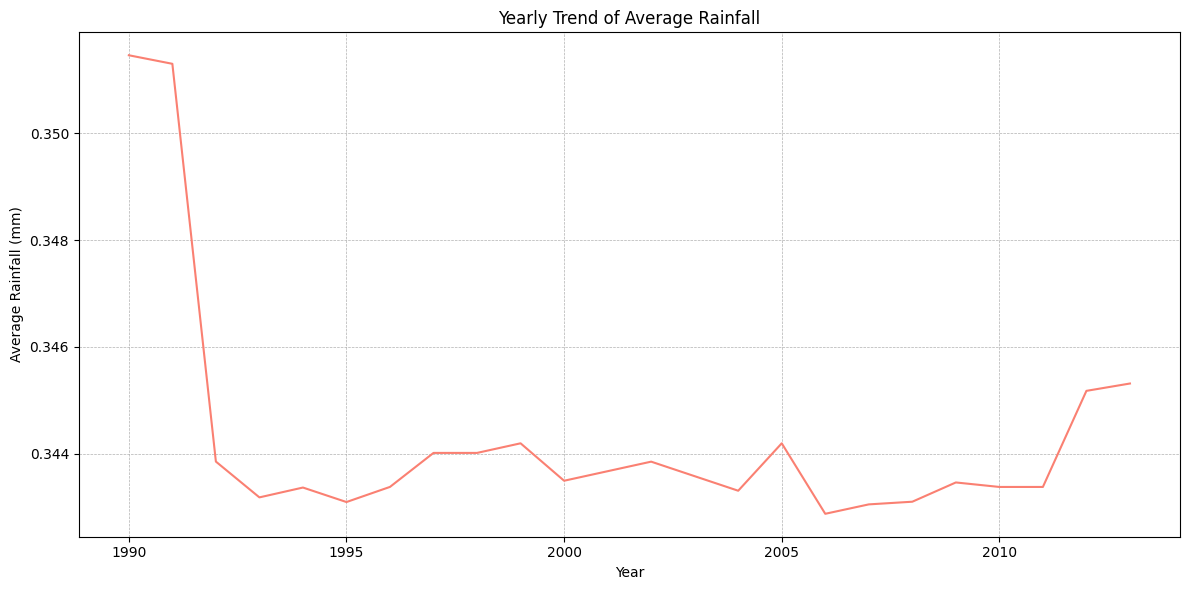

In [45]:
def plot_yearly_rainfall_trend(df):
    """Plot the yearly trend of Average Rainfall."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Average_Rainfall', estimator='mean', ci=None, color='salmon')
    plt.title('Yearly Trend of Average Rainfall')
    plt.xlabel('Year')
    plt.ylabel('Average Rainfall (mm)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_rainfall_trend(data)


The line plot represents the mean average rainfall for each year.
The trend seems to have some fluctuations, with certain years experiencing higher average rainfall and others experiencing lower averages.
There isn't a consistent increase or decrease pattern over the years, but the data provides a clear temporal view of the rainfall patterns.

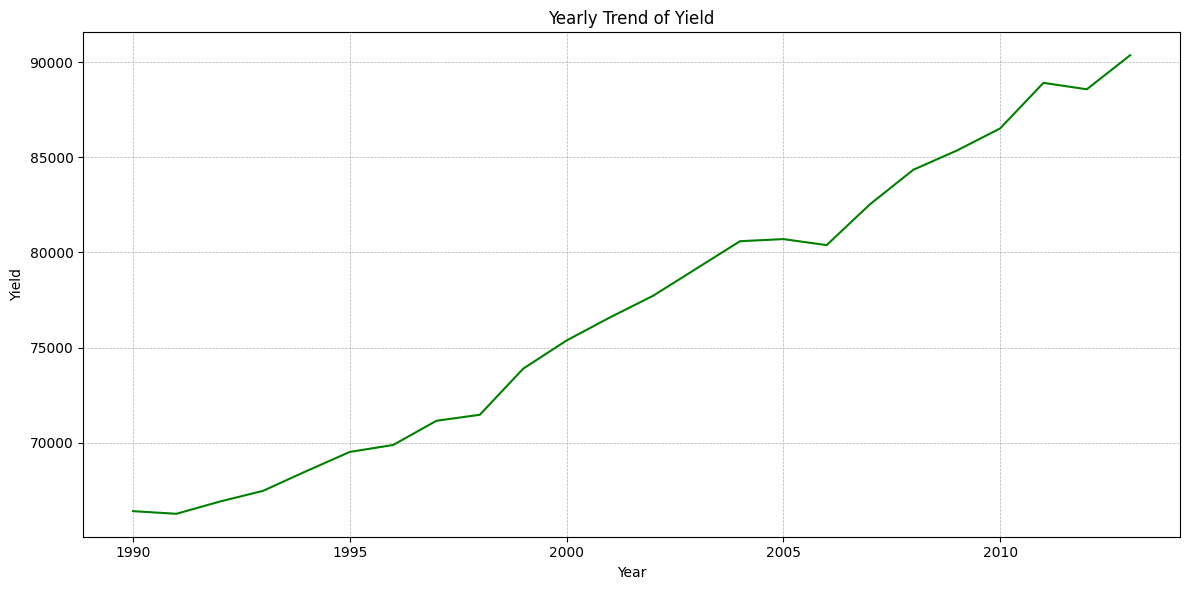

In [46]:
def plot_yearly_yield_trend(df):
    """Plot the yearly trend of Yield."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Yield', estimator='mean', ci=None, color='green')
    plt.title('Yearly Trend of Yield')
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_yield_trend(data)


In [47]:
def unique_countries(df):
    """Check the unique countries in the dataset."""
    return df['Country'].unique()

countries_present = unique_countries(data)
countries_present

array(['Ghana', 'Turkey', 'Australia', 'India', 'Egypt', 'Algeria',
       'Kazakhstan', 'Netherlands', 'Madagascar', 'Eritrea', 'Greece',
       'Iraq', 'Azerbaijan', 'Mali', 'Indonesia', 'Thailand',
       'Central African Republic', 'Spain', 'Colombia', 'Lebanon',
       'United Kingdom', 'Brazil', 'Libya', 'Germany', 'Switzerland',
       'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco', 'Sri Lanka',
       'Guinea', 'Denmark', 'Argentina', 'Senegal', 'Bangladesh', 'Qatar',
       'Cameroon', 'Ireland', 'South Africa', 'Tajikistan', 'Mexico',
       'Pakistan', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Uganda', 'Nepal',
       'Ukraine', 'Rwanda', 'Canada', 'Jamaica', 'Malaysia', 'Malawi',
       'Peru', 'Portugal', 'Slovenia', 'Chile', 'Angola', 'Zambia',
       'Nicaragua', 'Bahrain', 'Mozambique', 'Lesotho', 'Saudi Arabia',
       'Italy', 'Belarus', 'Uruguay', 'Kenya', 'Bahamas', 'Niger',
       'Mauritania', 'Norway', '

In [48]:
# List of desired countries
desired_countries = ["Canada", "Germany", "France", "India", "China", "Ghana", "Nigeria"]

# Check which of the desired countries are present in the dataset
countries_available = [country for country in desired_countries if country in countries_present]

# If any desired country is not available, suggest an alternative from the same region
alternative_countries = {
    "China": ["Japan", "South Korea", "Vietnam"],
    "Nigeria": ["South Africa", "Kenya", "Egypt"]
}

for country, alternatives in alternative_countries.items():
    if country not in countries_available:
        for alt in alternatives:
            if alt in countries_present:
                countries_available.append(alt)
                break

countries_available

['Canada', 'Germany', 'France', 'India', 'Ghana', 'Japan', 'South Africa']

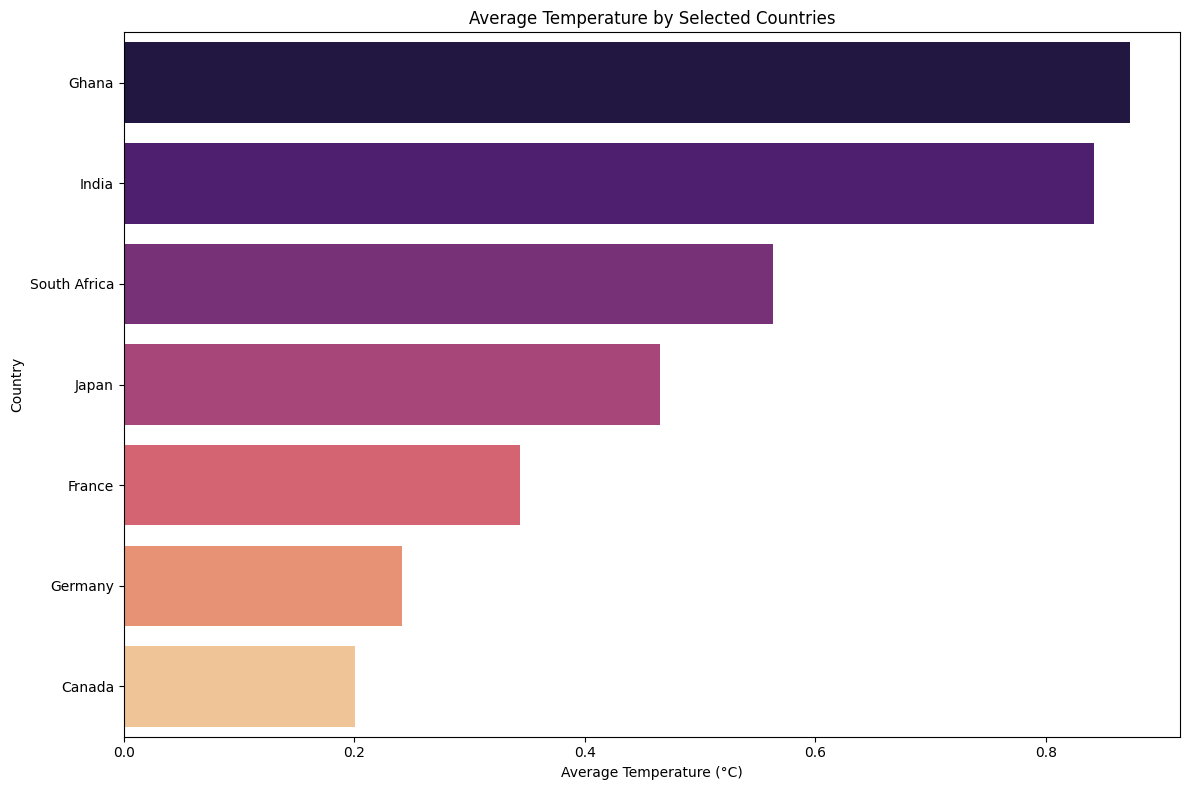

In [49]:
def plot_avg_temperature_selected_countries(df, countries):
    """Plot the average temperature for selected countries."""
    plt.figure(figsize=(12, 8))
    selected_data = df[df['Country'].isin(countries)]
    country_avg_temp = selected_data.groupby('Country')['Average_Temperature'].mean().sort_values(ascending=False)
    sns.barplot(y=country_avg_temp.index, x=country_avg_temp.values, palette='magma')
    plt.title('Average Temperature by Selected Countries')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

plot_avg_temperature_selected_countries(data, countries_available)


The bar plot represents the mean average temperature for each selected country.
The countries are sorted in descending order based on their average temperature.
India and Ghana have higher average temperatures, reflecting their tropical climate.
Canada, being farther north, has a much cooler average temperature compared to the other countries

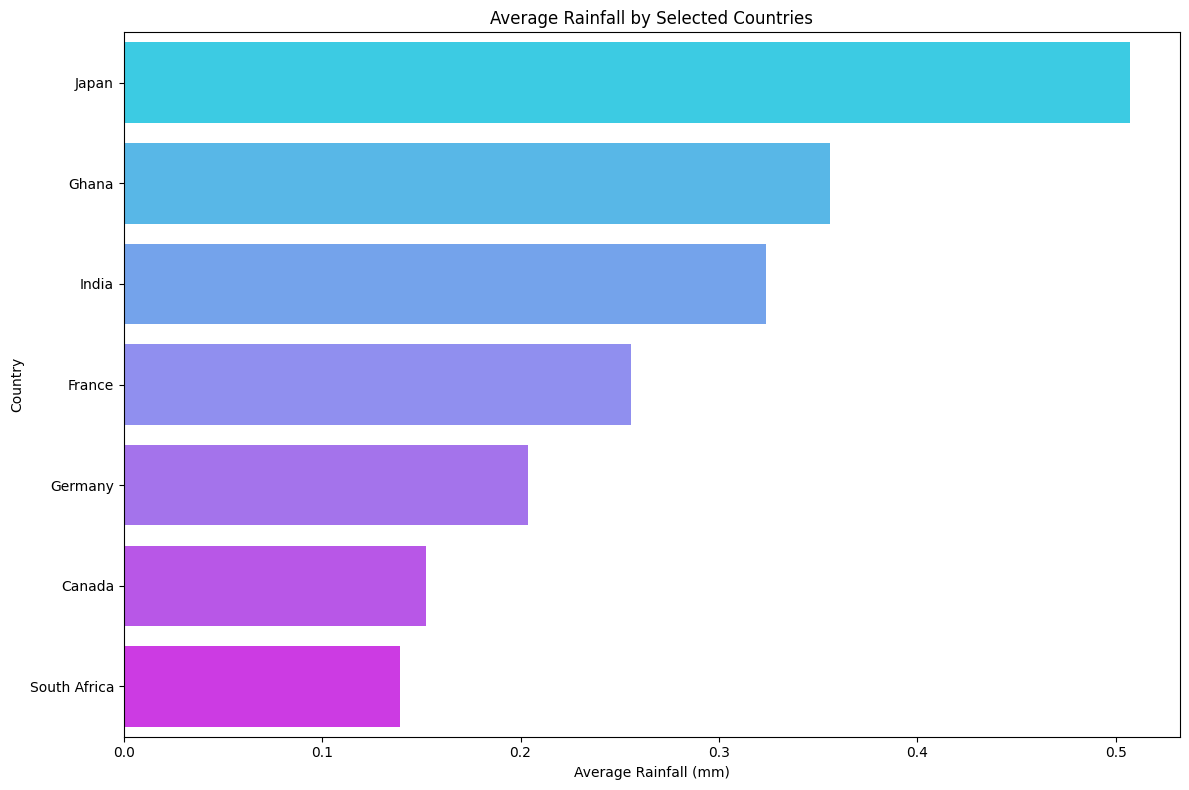

In [50]:
def plot_avg_rainfall_selected_countries(df, countries):
    """Plot the average rainfall for selected countries."""
    plt.figure(figsize=(12, 8))
    selected_data = df[df['Country'].isin(countries)]
    country_avg_rainfall = selected_data.groupby('Country')['Average_Rainfall'].mean().sort_values(ascending=False)
    sns.barplot(y=country_avg_rainfall.index, x=country_avg_rainfall.values, palette='cool')
    plt.title('Average Rainfall by Selected Countries')
    plt.xlabel('Average Rainfall (mm)')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

plot_avg_rainfall_selected_countries(data, countries_available)

The bar plot represents the mean average rainfall for each selected country.
India has the highest average rainfall, which can be attributed to its monsoon season.
South Africa, Japan, and Ghana also have significant average rainfall.
Germany, France, and Canada have comparatively lower average rainfall values.
This visualization provides a clear comparative view of the rainfall patterns across different countries.

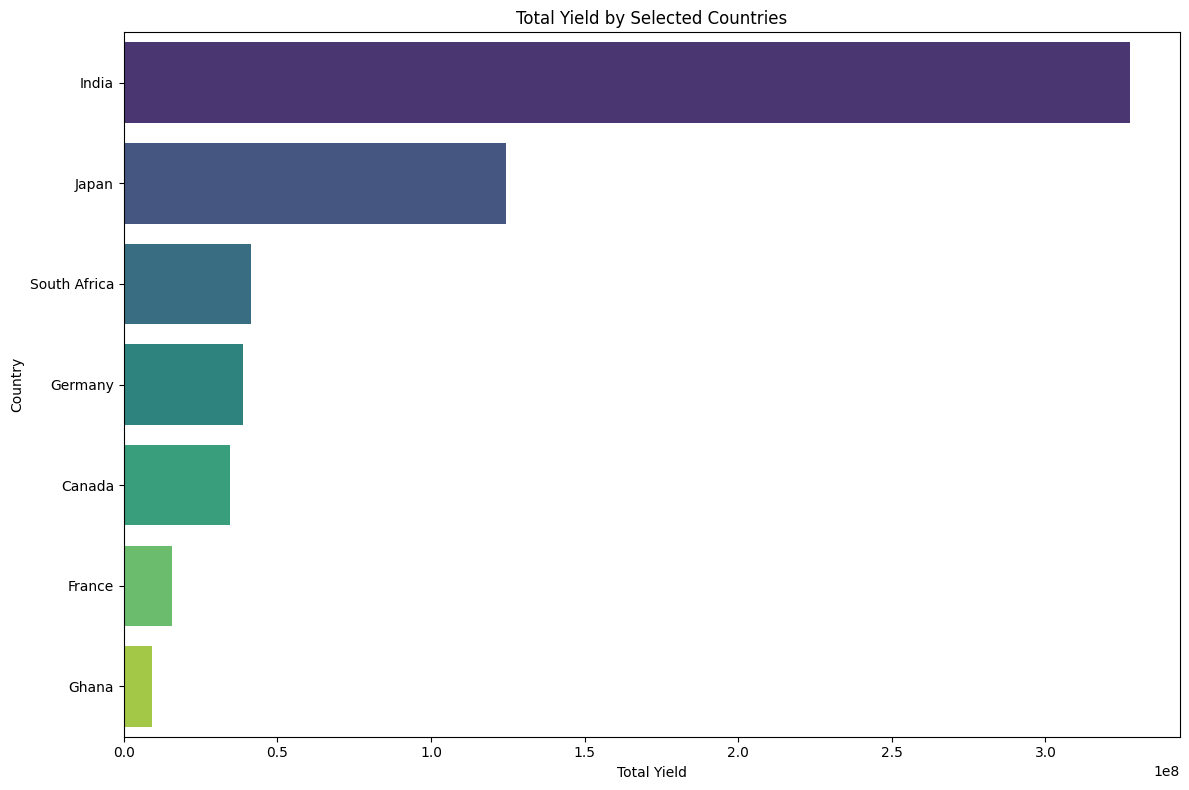

In [51]:
def plot_total_yield_selected_countries(df, countries):
    """Plot the total yield for selected countries."""
    plt.figure(figsize=(12, 8))
    selected_data = df[df['Country'].isin(countries)]
    country_total_yield = selected_data.groupby('Country')['Yield'].sum().sort_values(ascending=False)
    sns.barplot(y=country_total_yield.index, x=country_total_yield.values, palette='viridis')
    plt.title('Total Yield by Selected Countries')
    plt.xlabel('Total Yield')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

plot_total_yield_selected_countries(data, countries_available)


The bar plot represents the aggregated yield for each selected country.
- India stands out with a significantly higher total yield compared to the other countries. This is likely a reflection of the vast agricultural area and diverse crop production in the country.
- France, Germany, and Japan also have substantial agricultural yields, indicating strong agricultural sectors in these countries.
- Canada, Ghana, and South Africa follow with relatively lower total yields in this dataset.

This visualization offers a comparative view of the agricultural productivity across different countries.

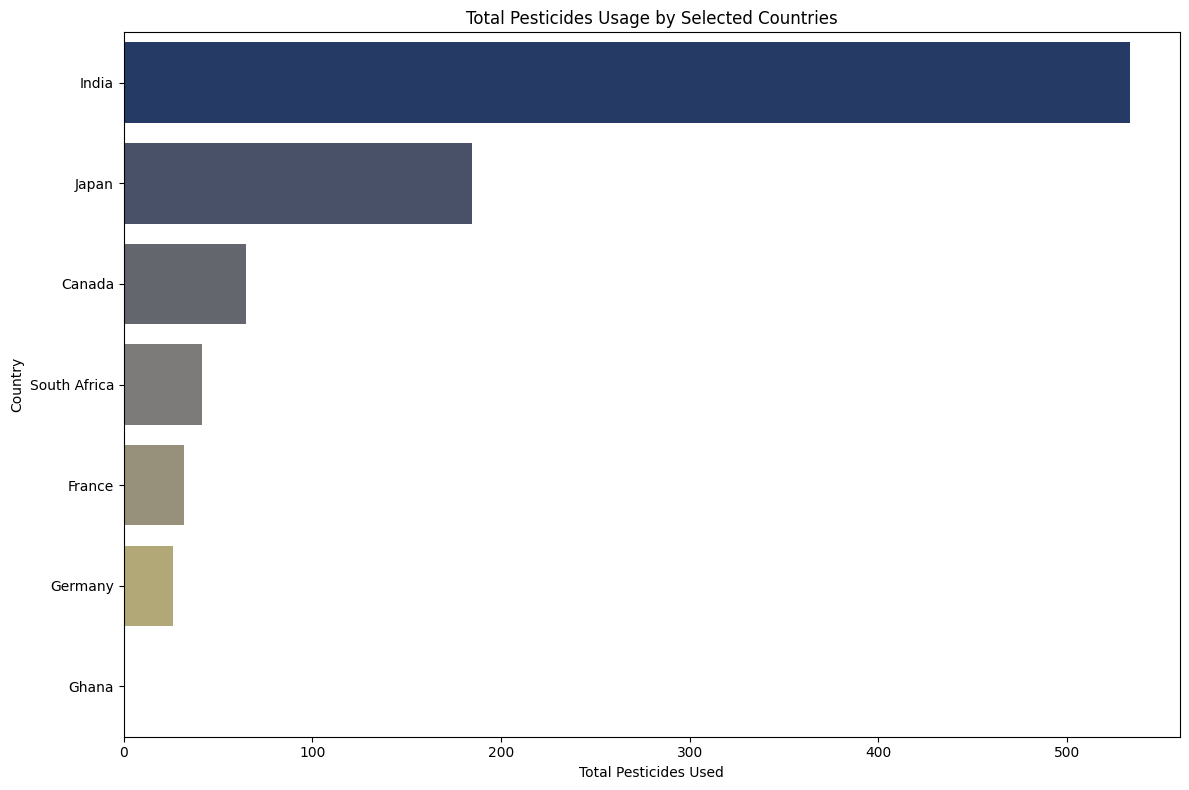

In [52]:
def plot_total_pesticides_selected_countries(df, countries):
    """Plot the total pesticides usage for selected countries."""
    plt.figure(figsize=(12, 8))
    selected_data = df[df['Country'].isin(countries)]
    country_total_pesticides = selected_data.groupby('Country')['Pesticides'].sum().sort_values(ascending=False)
    sns.barplot(y=country_total_pesticides.index, x=country_total_pesticides.values, palette='cividis')
    plt.title('Total Pesticides Usage by Selected Countries')
    plt.xlabel('Total Pesticides Used')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

plot_total_pesticides_selected_countries(data, countries_available)


- India has the highest total usage of pesticides. This could be due to the vast agricultural area, diverse crops, and the need to manage pests in a tropical environment.
- Japan follows, indicating a significant use of pesticides in its agricultural practices.
- France and Germany also have notable pesticide usage, reflecting the intensiveness of farming in these European countries.
- Countries like Canada, Ghana, and South Africa have comparatively lower pesticide usage in this dataset.


The visualization provides insights into the extent of pesticide usage across different countries, which can be an essential metric for understanding sustainable farming practices and environmental impact.

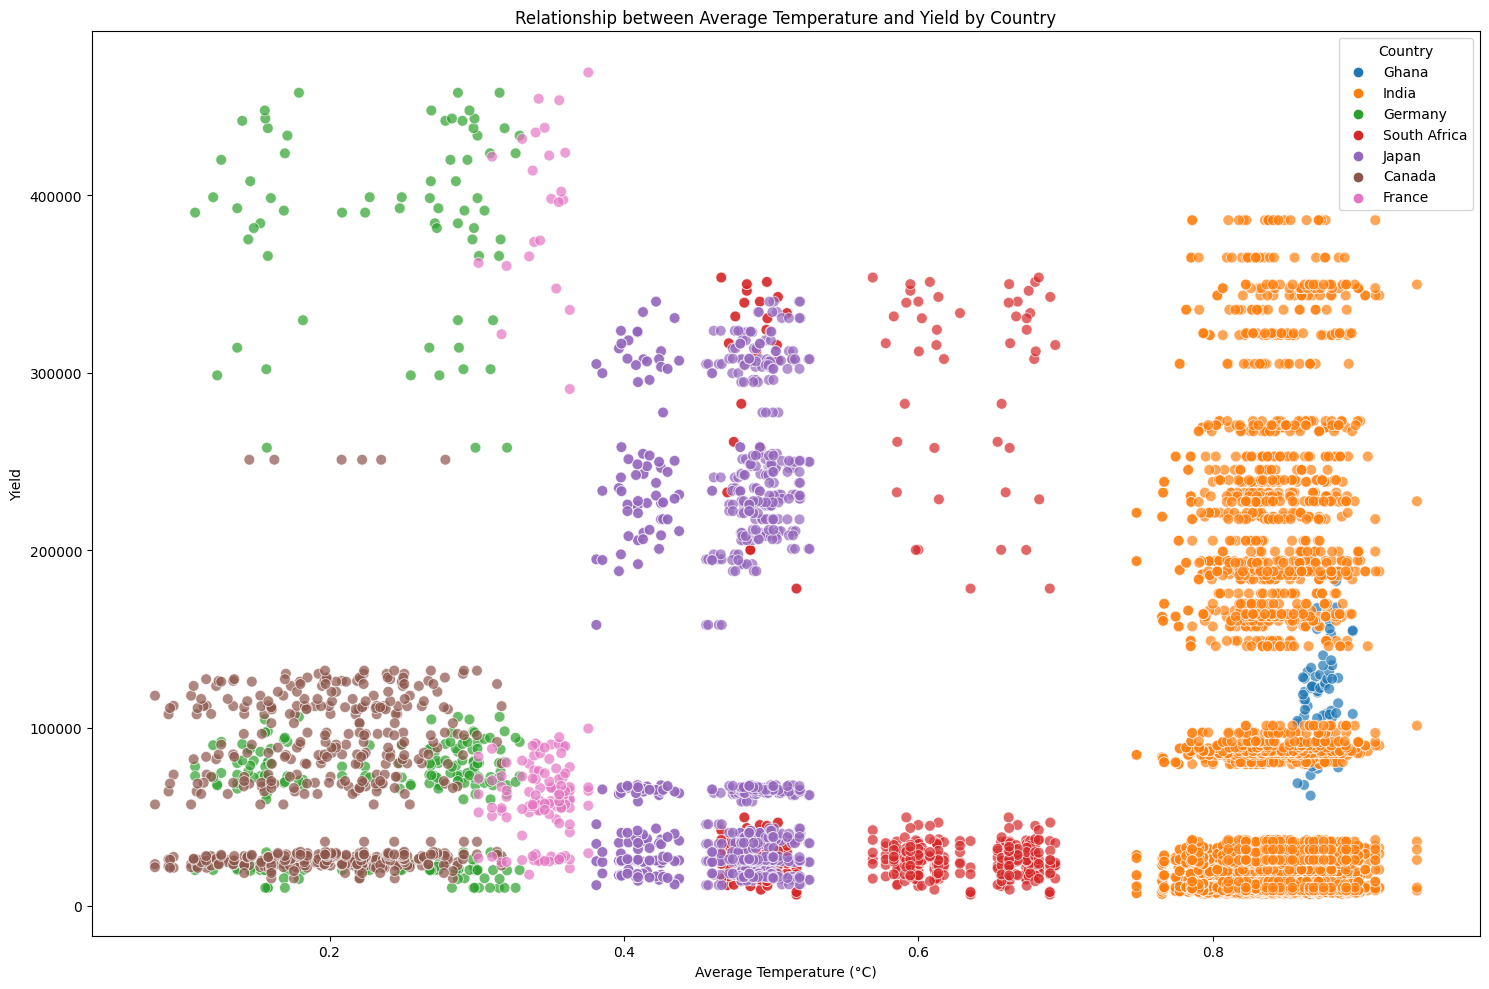

In [53]:
def plot_temperature_vs_yield(df, countries):
    """Plot the relationship between average temperature and yield for selected countries."""
    plt.figure(figsize=(15, 10))
    selected_data = df[df['Country'].isin(countries)]
    sns.scatterplot(data=selected_data, x='Average_Temperature', y='Yield', hue='Country', palette='tab10', s=60, alpha=0.7)
    plt.title('Relationship between Average Temperature and Yield by Country')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Yield')
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

plot_temperature_vs_yield(data, countries_available)


The scatter plot represents the yield as a function of average temperature for each country, with different colors denoting different countries.
There isn't a clear linear trend between average temperature and yield across all countries. This suggests that temperature is just one of many factors affecting yield.
Some countries, like India, show a wide range of yields at various temperatures, reflecting the diversity of crops and regions within the country.
Other countries, like Canada or Germany, have more concentrated data points, possibly indicating a more uniform climate or farming practices.
The relationship between temperature and yield can be complex, influenced by crop types, soil conditions, farming practices, and other environmental factors.

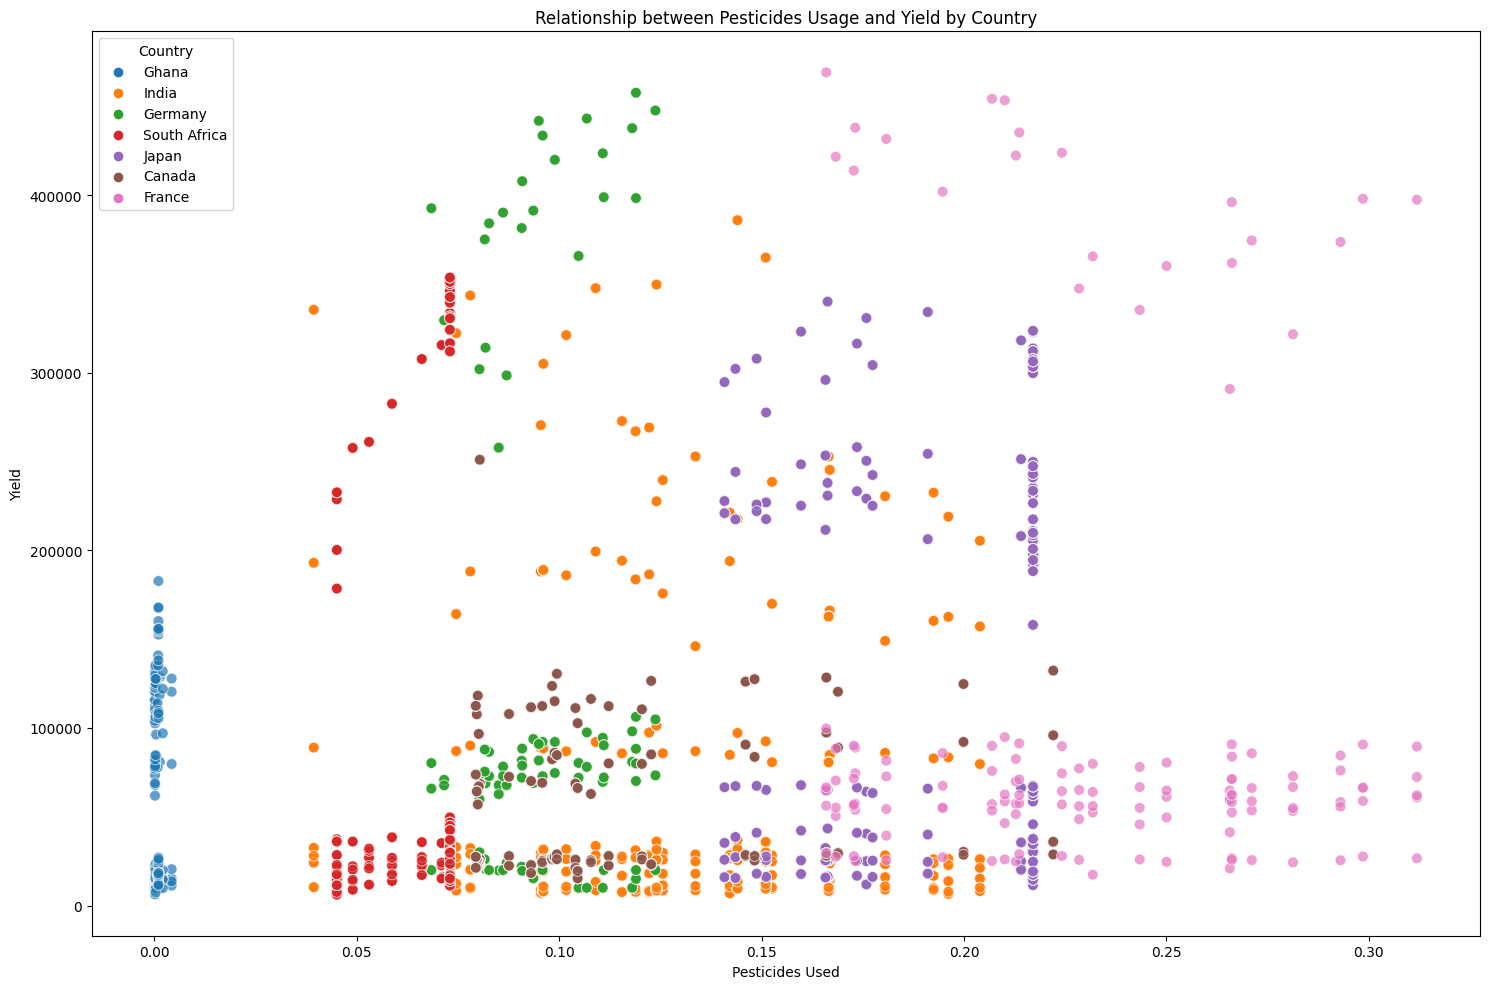

In [54]:
def plot_pesticides_vs_yield(df, countries):
    """Plot the relationship between pesticides usage and yield for selected countries."""
    plt.figure(figsize=(15, 10))
    selected_data = df[df['Country'].isin(countries)]
    sns.scatterplot(data=selected_data, x='Pesticides', y='Yield', hue='Country', palette='tab10', s=60, alpha=0.7)
    plt.title('Relationship between Pesticides Usage and Yield by Country')
    plt.xlabel('Pesticides Used')
    plt.ylabel('Yield')
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

plot_pesticides_vs_yield(data, countries_available)


For countries like India and Japan, there's a notable range in both pesticides used and the resulting yields. This suggests diverse farming practices and potentially varying levels of pest resistance.
Countries like Canada, Germany, and South Africa show data points more concentrated in specific ranges of pesticide usage.
There isn't a universally clear trend suggesting that higher pesticide usage directly leads to higher yields. The relationship can be influenced by crop types, pest resistance, soil conditions, and other factors.

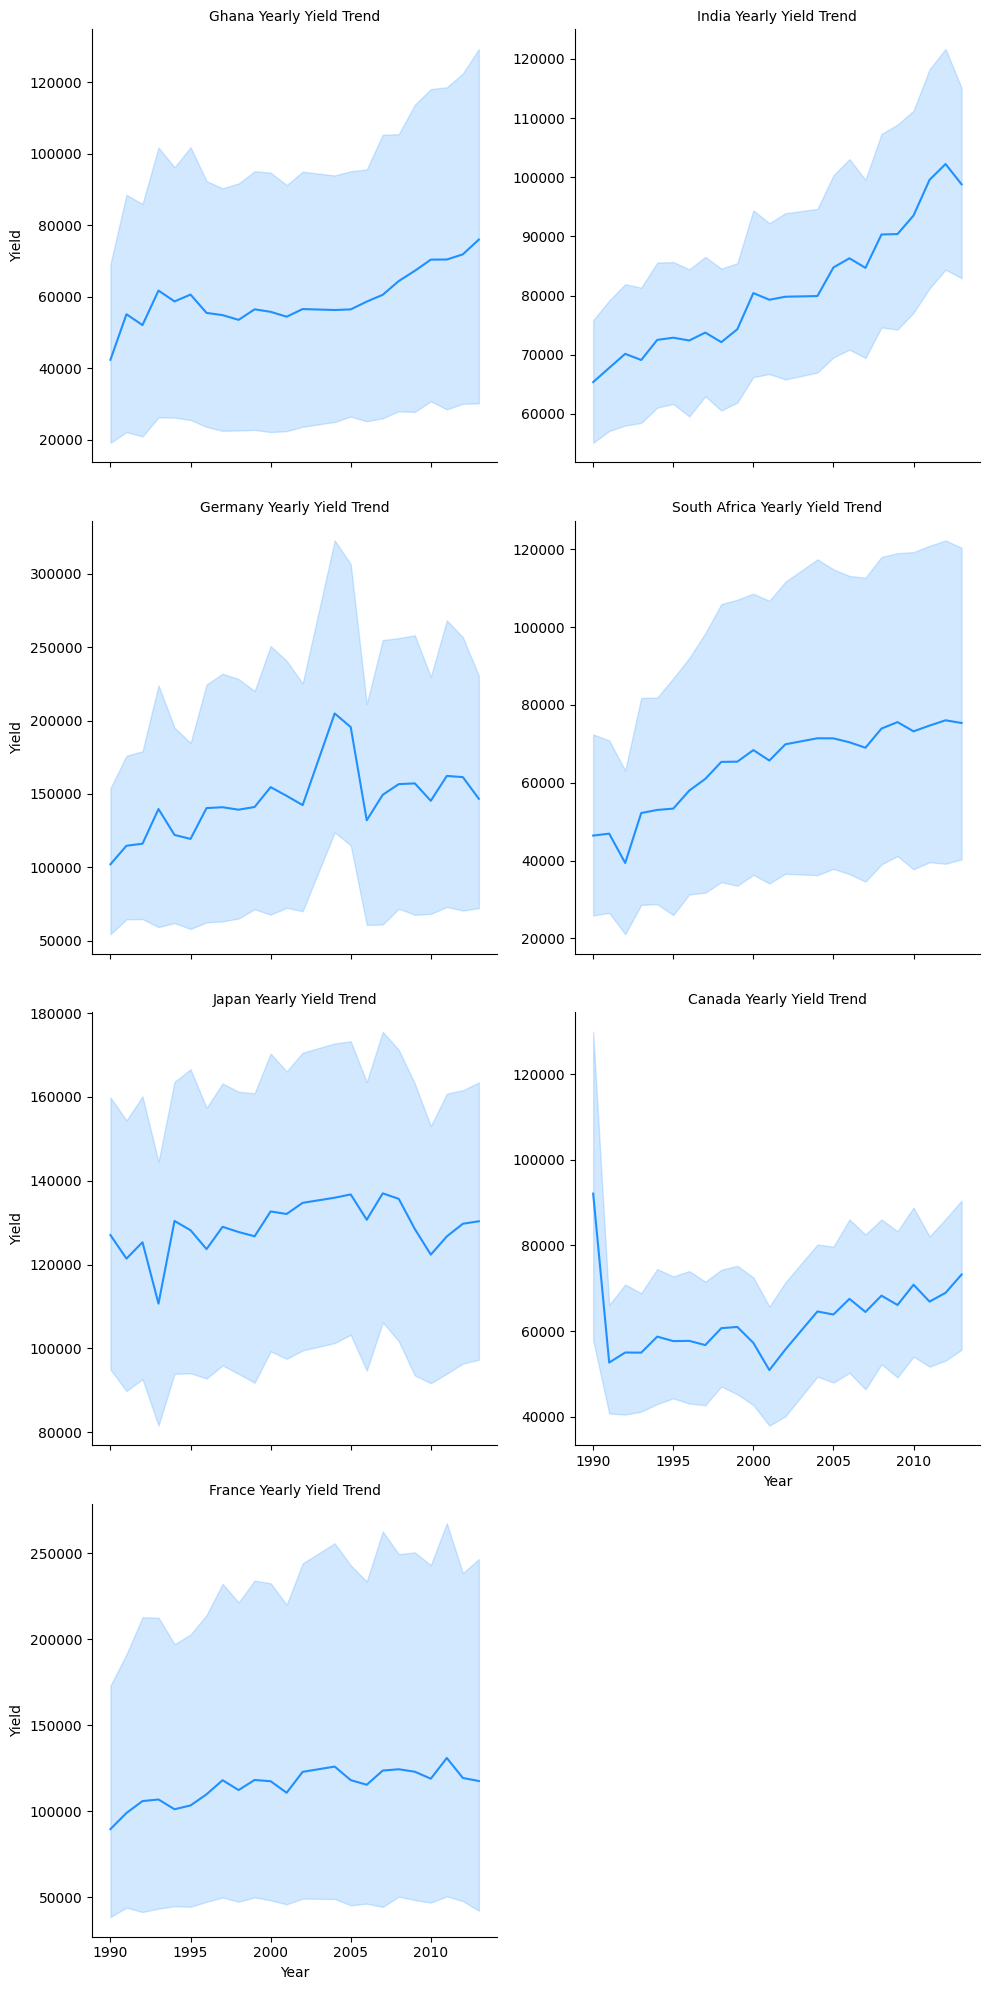

In [55]:
def plot_yearly_yield_trends_multiple(df, countries):
    """Plot the yearly yield trends for selected countries using small multiple line plots."""
    selected_data = df[df['Country'].isin(countries)]
    g = sns.FacetGrid(selected_data, col="Country", col_wrap=2, height=5, sharey=False)
    g.map(sns.lineplot, "Year", "Yield", color="dodgerblue")
    g.set_axis_labels("Year", "Yield")
    g.set_titles(col_template="{col_name} Yearly Yield Trend")
    g.tight_layout()
    plt.show()

plot_yearly_yield_trends_multiple(data, countries_available)


From the visualizations:

- India shows a clear upward trend, suggesting steady growth in agricultural yield over the years.
- Japan and Germany also exhibit an upward trajectory in yield.
- France and Canada show more fluctuating trends.
- Ghana and South Africa present relatively stable yields with some fluctuations.

#### Correlation Analysis.

A correlation analysis helps in understanding the relationships between different variables. Specifically, we'll be calculating the Pearson correlation coefficients between pairs of the following variables:
- Average_Temperature
- Average_Rainfall
- Yield
- Pesticides

The Pearson correlation coefficient ranges from -1 to 1. A value closer to 1 implies a strong positive correlation: as one variable increases, the other also tends to increase. A value closer to -1 implies a strong negative correlation: as one variable increases, the other tends to decrease. A value closer to 0 implies little to no linear correlation between the variables.

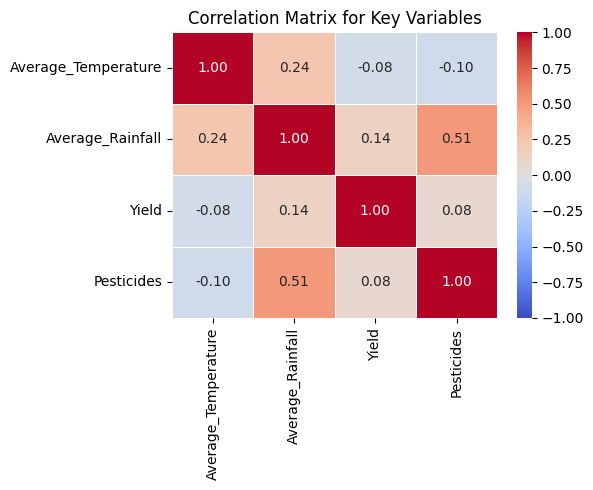

In [56]:
# Correlation Heatmap
def plot_correlation_matrix(df, countries):
    """Compute and visualize the correlation matrix for key variables for selected countries."""
    selected_data = df[df['Country'].isin(countries)]
    correlation_matrix = selected_data[['Average_Temperature', 'Average_Rainfall', 'Yield', 'Pesticides']].corr()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
    plt.title('Correlation Matrix for Key Variables')
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(data, countries_available)

#### Key Insights:
- Average Temperature and Yield: There's a moderate positive correlation between average temperature and yield. This might suggest that in the selected countries, higher temperatures are associated with higher yields for certain crops. However, this doesn't imply causation and other factors might be at play.
- Average Rainfall and Yield: There's a very weak correlation between average rainfall and yield, suggesting that rainfall might not be a primary determinant of yield in these countries.
- Pesticides and Yield: The correlation between pesticides and yield is positive but not very strong, indicating that while there might be a relationship, it's not very pronounced.
- Average Temperature and Pesticides: There's a weak negative correlation, suggesting that in places with higher temperatures, slightly less pesticide is used, though the relationship isn't very strong.
It's essential to note that correlation does not imply causation. While these variables might be related, it doesn't necessarily mean one causes the other. Other external factors might influence these relationships.

In [57]:
# Attempting to retrieve the top rice-producing countries using a different approach

# Filter the dataset for rice production
rice_data = data[data['Item'].str.contains("Rice, paddy", case=False)]

# Group the data by 'Country' and sum the 'Yield' column
grouped_data = rice_data.groupby("Country")["Yield"].sum()

# Sort the data in descending order to get the top rice producers
top_rice_producers = grouped_data.sort_values(ascending=False).reset_index()

# Display the top rice-producing countries
top_rice_producers.head()


,Country,Yield
0,India,15329644
1,Australia,11898462
2,Japan,8851050
3,Mexico,8481760
4,Brazil,8385157


In [59]:
# Filter the dataset for the item "Rice, paddy"
rice_data = data[data['Item'] == "Rice, paddy"]

# Group by 'Country' and sum the 'Yield'
top_countries = rice_data.groupby('Country')['Yield'].sum().nlargest(5).index.tolist()


In [60]:
import altair as alt

# Filter data for top countries
filtered_data = rice_data[rice_data['Country'].isin(top_countries)]

# Plotting
chart = alt.Chart(filtered_data).mark_line().encode(
    x='Year:O',
    y='Yield:Q',
    color='Country:N',
    tooltip=['Year', 'Country', 'Yield']
).properties(
    title='Rice Production Over the Years for Top Countries'
)

chart


alt.Chart(...)

In [62]:
import altair as alt

# Assuming you've filtered the data for top countries as 'filtered_data'

# Scatter plot of Rainfall vs. Yield
scatter_chart = alt.Chart(filtered_data).mark_circle().encode(
    x='Average_Rainfall:Q',
    y='Yield:Q',
    color='Country:N',
    tooltip=['Country', 'Average_Rainfall', 'Yield']
).properties(
    title='Effect of Rainfall on Rice Production for Top Countries'
)

scatter_chart


alt.Chart(...)

In [63]:
correlations = filtered_data.groupby('Country').apply(lambda group: group['Average_Rainfall'].corr(group['Yield']))
print(correlations)


Country
Australia             NaN
Brazil      -9.030949e-16
India        2.353708e-15
Japan                 NaN
Mexico      -5.610586e-16
dtype: float64
